In [11]:
# Mahdi Hassanzadeh

import random
import math
import matplotlib.pyplot as plt



In [12]:
# get cities info
def getCity():
    cities = []
    file = open("cities.txt")
    for i in file.readlines():
        node_city_val = i.split()
        cities.append(
            [node_city_val[0], float(node_city_val[1]), float(node_city_val[2])]
        )

    return cities

In [13]:
# calculating distance of the cities
def calcDistance(cities):
    total_distance = 0
    for i in range(len(cities) - 1):
        cityA = cities[i]
        cityB = cities[i + 1]

        distance = math.sqrt(
            math.pow(cityB[1] - cityA[1], 2) + math.pow(cityB[2] - cityA[2], 2)
        )

        total_distance += distance

    cityA = cities[0]
    cityB = cities[-1]
    distance_firstcity_lastcity = math.sqrt(math.pow(cityB[1] - cityA[1], 2) + math.pow(cityB[2] - cityA[2], 2))

    total_distance += distance_firstcity_lastcity

    return total_distance



In [14]:

# selecting the population
def selectPopulation(cities, size):
    population = []

    for i in range(size):
        copy = cities.copy()
        random.shuffle(copy)
        distance = calcDistance(copy)
        population.append([distance, copy])
    fitest = sorted(population)[0]

    return population, fitest


In [15]:


# the genetic algorithm
def geneticAlgorithm(
    population,
    lenCities,
    TOURNAMENT_SELECTION_SIZE,
    MUTATION_RATE,
    CROSSOVER_RATE,
    TARGET,
):
    gen_number = 0
    for i in range(200):
        new_population = []

        # selecting two of the best options we have (elitism)
        new_population.append(sorted(population)[0])
        new_population.append(sorted(population)[1])

        for i in range(int((len(population) - 2) / 2)):
            # CROSSOVER
            random_number = random.random()
            if random_number < CROSSOVER_RATE:
                parent_chromosome1 = sorted(
                    random.choices(population, k=TOURNAMENT_SELECTION_SIZE)
                )[0]

                parent_chromosome2 = sorted(
                    random.choices(population, k=TOURNAMENT_SELECTION_SIZE)
                )[0]

                point = random.randint(0, lenCities - 1)

                child_chromosome1 = parent_chromosome1[1][0:point]
                for j in parent_chromosome2[1]:
                    if (j in child_chromosome1) == False:
                        child_chromosome1.append(j)

                child_chromosome2 = parent_chromosome2[1][0:point]
                for j in parent_chromosome1[1]:
                    if (j in child_chromosome2) == False:
                        child_chromosome2.append(j)

            # If crossover not happen
            else:
                child_chromosome1 = random.choices(population)[0][1]
                child_chromosome2 = random.choices(population)[0][1]

            # MUTATION
            if random.random() < MUTATION_RATE:
                point1 = random.randint(0, lenCities - 1)
                point2 = random.randint(0, lenCities - 1)
                child_chromosome1[point1], child_chromosome1[point2] = (
                    child_chromosome1[point2],
                    child_chromosome1[point1],
                )

                point1 = random.randint(0, lenCities - 1)
                point2 = random.randint(0, lenCities - 1)
                child_chromosome2[point1], child_chromosome2[point2] = (
                    child_chromosome2[point2],
                    child_chromosome2[point1],
                )

            new_population.append([calcDistance(child_chromosome1), child_chromosome1])
            new_population.append([calcDistance(child_chromosome2), child_chromosome2])

        population = new_population

        gen_number += 1

        if gen_number % 10 == 0:
            print(gen_number, sorted(population)[0][0])

        if sorted(population)[0][0] < TARGET:
            break

    answer = sorted(population)[0]

    return answer, gen_number


In [16]:
# draw cities and answer map
def drawMap(city, answer):
    for j in city:
        plt.plot(j[1], j[2], "ro")
        plt.annotate(j[0], (j[1], j[2]))

    for i in range(len(answer[1])):
        try:
            first = answer[1][i]
            second = answer[1][i + 1]

            plt.plot([first[1], second[1]], [first[2], second[2]], "gray")
        except:
            continue

    first = answer[1][0]
    second = answer[1][-1]
    plt.plot([first[1], second[1]], [first[2], second[2]], "gray")

    plt.show()



10 1026.7820274886815
20 860.7960000456198
30 727.339383010746
40 663.9849449210996
50 621.2989419918267
60 587.1695849846817
70 565.3704646381811
80 556.0251904934506
90 554.9433479656494
100 549.3585814001407
110 547.1128978300253
120 545.1804053721596
130 532.3417470574467
140 525.5905792990609
150 521.2145396261794
160 520.1425013336336
170 516.9339620309391
180 516.789861809816
190 516.789861809816
200 516.789861809816

----------------------------------------------------------------
Generation: 200
Fittest chromosome distance before training: 1331.8693819976404
Fittest chromosome distance after training: 516.789861809816
Target distance: 450.0
----------------------------------------------------------------



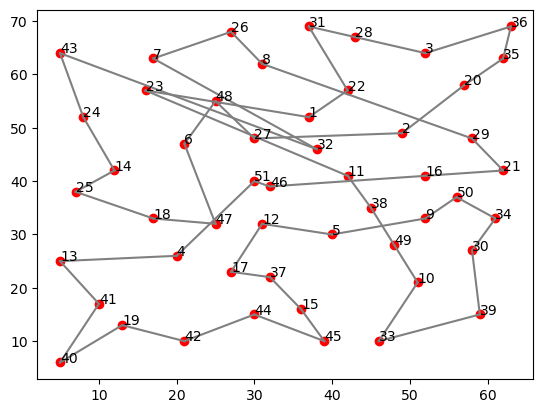

In [17]:

def main():
    # initial values
    POPULATION_SIZE = 2000
    TOURNAMENT_SELECTION_SIZE = 4
    MUTATION_RATE = 0.1
    CROSSOVER_RATE = 0.9
    TARGET = 450.0

    cities = getCity()
    firstPopulation, firstFitest = selectPopulation(cities, POPULATION_SIZE)
    answer, genNumber = geneticAlgorithm(
        firstPopulation,
        len(cities),
        TOURNAMENT_SELECTION_SIZE,
        MUTATION_RATE,
        CROSSOVER_RATE,
        TARGET,
    )

    print("\n----------------------------------------------------------------")
    print("Generation: " + str(genNumber))
    print("Fittest chromosome distance before training: " + str(firstFitest[0]))
    print("Fittest chromosome distance after training: " + str(answer[0]))
    print("Target distance: " + str(TARGET))
    print("----------------------------------------------------------------\n")

    drawMap(cities, answer)


main()
